0. Початковий етап - імпорт бібліотек і завантаження файлу

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/yulu_rental.csv')

1. Як швидкість вітру (windspeed) при різній погоді (weather) впливає на кількість оренд (count)? *Тут можемо побудувати візуалізацію графіка розсіювання між змінними, зазначивши колір точки в відповідності до значення змінної погоди.

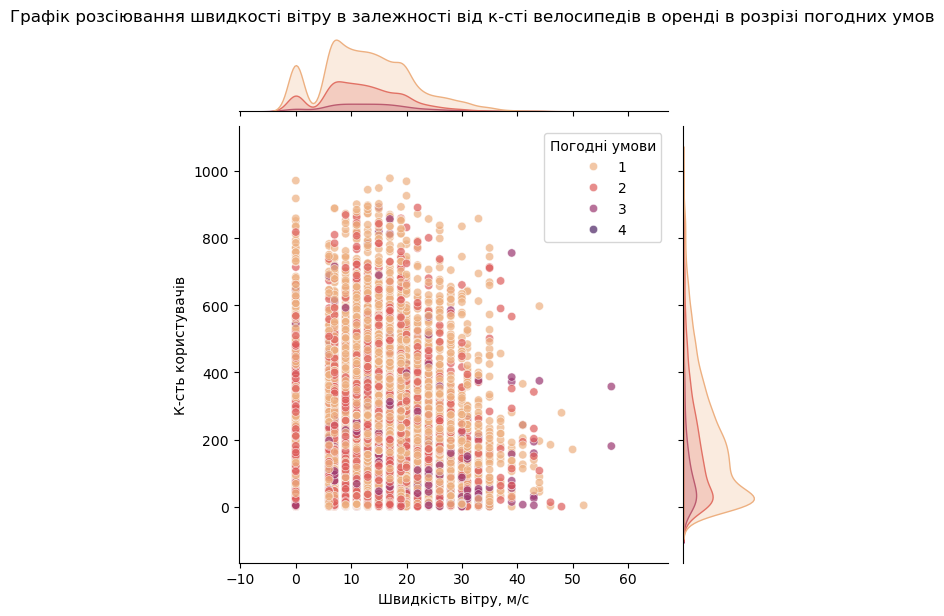

In [104]:
sns.jointplot(data=df, x='windspeed', y='count', hue='weather', palette='flare', alpha=0.7)
plt.suptitle('Графік розсіювання швидкості вітру в залежності від к-сті велосипедів в оренді в розрізі погодних умов', y=1.02)
plt.xlabel('Швидкість вітру, м/с')
plt.ylabel('К-сть користувачів')
plt.legend(title='Погодні умови')
plt.show()

- Щільність точок: є великий розкид точок за різними рівнями швидкості вітру з щільнішим групуванням на нижчих рівнях швидкості вітру. Це вказує на те, що кількість велосипедів на прокат при швидкості вітру до 20 (м/с) вища.
- Категорії погоди: погодні умови, позначені кольором, показують тип погоди в момент оренди. В ясні та похмурі дні (1 і 2) більше орендованих велосипедів у порівнянні до днів з опадами (3 і 4) тип погоди
- Викиди: помітні викиди, такі як оренда великої кількості велосипедів навіть у 0-вою швидкістю вітру і дуже високою (50-60), ці викиди слід досліджувати окремо.
- Граничні розподіли: на верхньому та правому полях графіка бачимо розподіли даних за категоріями.Найбільше точок є з ясною погодою і при нижчих показниках швидкості вітру. Можемо зробити чіткий висновок, що існує звязок між кількістю користувачів і швидкістю вітру незалежно від умов погоди - чим нижча швидкість вітру, тим більше замовлень

2. Чи є залежність між температурою, що відчувається (atemp) і кількістю оренд (count)? *Тут можемо побудувати точкову діаграму з лінією регресії для виявлення потенційних трендів у даних.

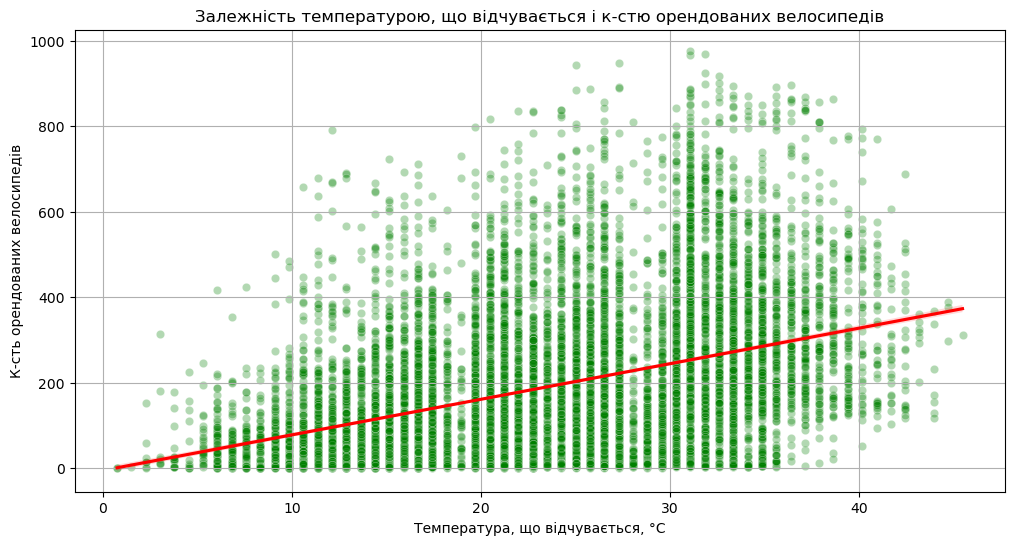

In [100]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='atemp', y='count', data=df, alpha=0.3, color='green')
sns.regplot(x='atemp', y='count', data=df, scatter=False, color='red')
plt.title('Залежність температурою, що відчувається і к-cтю орендованих велосипедів')
plt.xlabel('Температура, що відчувається, °C')
plt.ylabel('К-сть орендованих велосипедів')
plt.grid(True)
plt.show()

- Кореляція: Як змінюється кількість орендованих велосипедів в залежності від відчутної температури. Бачимо, що замовлення поступово збільшуються при збільшенні відчутної температури до приблизно 32 градусів і далі поступово зменшується
- Тренди: Чи є видимий тренд, який показує зростання або зменшення попиту з підвищенням або зниженням відчутної температури. Лінія регресії допомагає визначити, що є позитивна тенденція замовлень при збільшенні температури.
- Аномалії: Чи є аномальні точки, які сильно відрізняються від загального тренду. Такі точки є при 19 і 28 градусах, бачимо, що там зовсім мала кількість замовлень - їх слід досліджувати окремо

3. Чи існує вплив часу доби (hour з datetime) на сезонний (season) попит на оренду (count)? *Тут можемо побудувати стовпчастий графік, який покаже середню кількість оренд по годинам доби для кожного сезону.

In [58]:
df['hour'] = df['datetime'].dt.hour #створення колонки з годинами

In [109]:
mean_count = df.groupby(['hour', 'season'])['count'].mean().reset_index()

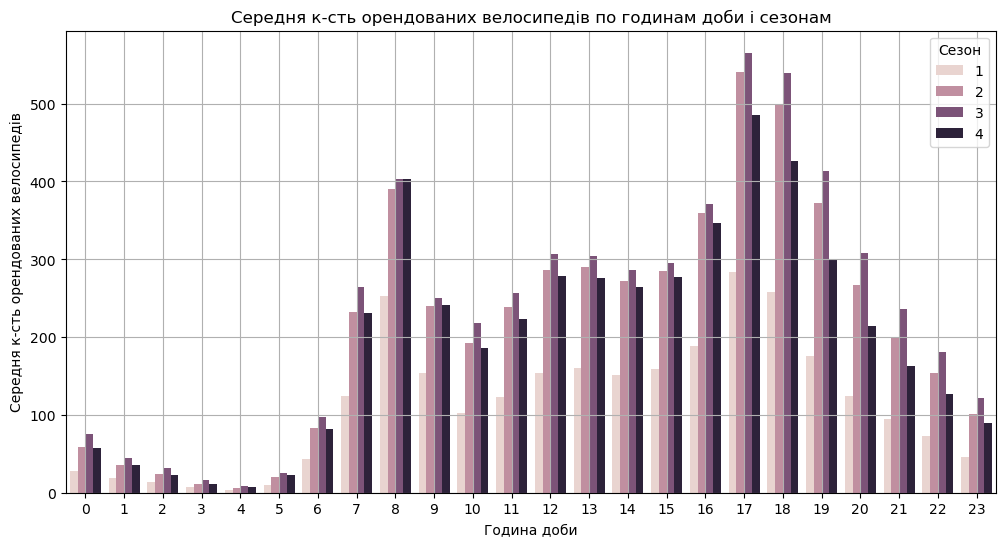

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', hue='season', data=mean_count)
plt.title('Середня к-сть орендованих велосипедів по годинам доби і сезонам')
plt.xlabel('Година доби')
plt.ylabel('Середня к-сть орендованих велосипедів')
plt.legend(title='Сезон')
plt.grid(True)
plt.show()

- Патерни годинного попиту: Можемо визначити, в яких годинах попит є найвищим і найнижчим. Бачимо, що піковими годинами є 8 ранку та 17-18 години вечора - ці часові проміжки можна пов'язати з робочим графіком користувачів (дорогою на/з роботи). Найменш популярними годинами є інтервал від 0 до 5 годин (нічні години). Ці вказані години вказують в який час рівень користування велосипедами є стабільно високим або низьким для кожного сезону. 
- Порівняння сезонів: Порівння середніх значень попиту на велосипеди для кожного сезону. Бачимо, що вцілому тендеції погодинного попиту для всіх сезонів (весна-літо-осінь-зима) зберігаються. Сезоном з найбільшими погодинними середньодобовими значеннями по кількості є осінь (далі в спадаючому порядку - літо-зима-весна). Це можна пояснити тим, що восени в Індії приємна погода - мусони закінчуються, вологість знижується, високий туристичний сезон та студенти/учні повертаються до навчання. Літо має дещо нижчі показники через високу температуру і вологість, але в той же час канікули в учнів/студентів, які можуть використовувати велосипеди для подорожей. Зима забезпечує помірні комфортні температури, але святкові періоди і можуть зменшити середньодобовий попит. Весна має найнижчі показники через нестабільні погодні умови та підвищення температури напередодні літа, велику кількість свят і фестивальів, що зменшують загальний інтерес до велосипедних поїздок.